# Assignment 1

**Due to**: 23/12/2021 (dd/mm/yyyy)

**Credits**: Andrea Galassi, Federico Ruggeri, Paolo Torroni

**Summary**: Part-of Speech (POS) tagging as Sequence Labelling using Recurrent Neural Architectures

# Intro

In this assignment  we will ask you to perform POS tagging using neural architectures

You are asked to follow these steps:
*   Download the corpora and split it in training and test sets, structuring a dataframe.
*   Embed the words using GloVe embeddings
*   Create a baseline model, using a simple neural architecture
*   Experiment doing small modifications to the baseline model, choose hyperparameters using the validation set
*   Evaluate your two best model
*   Analyze the errors of your model


**Task**: given a corpus of documents, predict the POS tag for each word

**Corpus**:
Ignore the numeric value in the third column, use only the words/symbols and its label. 
The corpus is available at:
https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/packages/corpora/dependency_treebank.zip

**Splits**: documents 1-100 are the train set, 101-150 validation set, 151-199 test set.


**Features**: you MUST use GloVe embeddings as the only input features to the model.

**Splitting**: you can decide to split documents into sentences or not, the choice is yours.

**I/O structure**: The input data will have three dimensions: 1-documents/sentences, 2-token, 3-features; for the output there are 2 possibilities: if you use one-hot encoding it will be 1-documents/sentences, 2-token labels, 3-classes, if you use a single integer that indicates the number of the class it will be 1-documents/sentences, 2-token labels.

**Baseline**: two layers architecture: a Bidirectional LSTM layer and a Dense/Fully-Connected layer on top; the choice of hyper-parameters is yours.

**Architectures**: experiment using a GRU instead of the LSTM, adding an additional LSTM layer, and adding an additional dense layer; do not mix these variantions.


**Training and Experiments**: all the experiments must involve only the training and validation sets.

**Evaluation**: in the end, only the two best models of your choice (according to the validation set) must be evaluated on the test set. The main metric must be F1-Macro computed between the various part of speech. DO NOT CONSIDER THE PUNCTUATION CLASSES.

**Metrics**: the metric you must use to evaluate your final model is the F1-macro, WITHOUT considering punctuation/symbols classes; during the training process you can use accuracy because you can't use the F1 metric unless you use a single (gigantic) batch because there is no way to aggregate "partial" F1 scores computed on mini-batches.

**Discussion and Error Analysis** : verify and discuss if the results on the test sets are coherent with those on the validation set; analyze the errors done by your model, try to understand which may be the causes and think about how to improve it.

**Report**: you are asked to deliver the code of your experiments and a small pdf report of about 2 pages; the pdf must begin with the names of the people of your team and a small abstract (4-5 lines) that sums up your findings.

# Out Of Vocabulary (OOV) terms

How to handle words that are not in GloVe vocabulary?
You can handle them as you want (random embedding, placeholder, whatever!), but they must be STATIC embeddings (you cannot train them).

But there is a very important caveat! As usual, the element of the test set must not influence the elements of the other splits!

So, when you compute new embeddings for train+validation, you must forget about test documents.
The motivation is to emulate a real-world scenario, where you select and train a model in the first stage, without knowing nothing about the testing environment.

For implementation convenience, you CAN use a single vocabulary file/matrix/whatever. The principle of the previous point is that the embeddings inside that file/matrix must be generated independently for train and test splits.

Basically in a real-world scenario, this is what would happen:
1. Starting vocabulary V1 (in this assignment, GloVe vocabulary)
2. Compute embeddings for terms out of vocabulary V1 (OOV1) of the training split 
3. Add embeddings to the vocabulary, so to obtain vocabulary V2=V1+OOV1
4. Training of the model(s)
5. Compute embeddings for terms OOV2 of the validation split 
6. Add embeddings to the vocabulary, so to obtain vocabulary V3=V1+OOV1+OOV2
7. Validation of the model(s)
8. Compute embeddings for terms OOV3 of the test split 
9. Add embeddings to the vocabulary, so to obtain vocabulary V4=V1+OOV1+OOV2+OOV3
10. Testing of the final model

In this case, where we already have all the documents, we can simplify the process a bit, but the procedure must remain rigorous.

1. Starting vocabulary V1 (in this assignment, GloVe vocabulary)
2. Compute embeddings for terms out of vocabulary V1 (OOV1) of the training split 
3. Add embeddings to the vocabulary, so to obtain vocabulary V2=V1+OOV1
4. Compute embeddings for terms OOV2 of the validation split 
5. Add embeddings to the vocabulary, so to obtain vocabulary V3=V1+OOV1+OOV2
6. Compute embeddings for terms OOV3 of the test split 
7. Add embeddings to the vocabulary, so to obtain vocabulary V4=V1+OOV1+OOV2
8. Training of the model(s)
9. Validation of the model(s)
10. Testing of the final model

Step 2 and step 6 must be completely independent of each other, for what concerns the method and the documents. But they can rely on the previous vocabulary (V1 for step 2 and V3 for step 6)
THEREFORE if a word is present both in the training set and the test split and not in the starting vocabulary, its embedding is computed in step 2) and it is not considered OOV anymore in step 6).

# Report
The report must not be just a copy and paste of graphs and tables!

The report must not be longer than 2 pages and must contain:
* The names of the member of your team
* A short abstract (4-5 lines) that sum ups everything
* A general description of the task you have addressed and how you have addressed it
* A short description of the models you have used
* Some tables that sum up your findings in validation and test and a discussion of those results
* The most relevant findings of your error analysis

# Evaluation Criterion

The goal of this assignment is not to prove you can find best model ever, but to face a common task, structure it correctly, and follow a correct and rigorous experimental procedure.
In other words, we don't care if you final models are awful as long as you have followed the correct procedure and wrote a decent report.

The score of the assignment will be computed roughly as follows
* 1 point for the general setting of the problem
* 1 point for the handling of OOV terms
* 1 point for the models
* 1 point for train-validation-test procedure
* 2 point for the discussion of the results, error analysis, and report

This distribution of scores is tentative and we may decide to alter it at any moment.
We also reserve the right to assign a small bonus (0.5 points) to any assignment that is particularly worthy. Similarly, in case of grave errors, we may decide to assign an equivalent malus (-0.5 points).

# Contacts

In case of any doubt, question, issue, or help we highly recommend you to check the [course useful material](https://virtuale.unibo.it/pluginfile.php/1036039/mod_resource/content/2/NLP_Course_Useful_Material.pdf) for additional information, and to use the Virtuale forums to discuss with other students.

You can always contact us at the following email addresses. To increase the probability of a prompt response, we reccomend you to write to both the teaching assistants.

Teaching Assistants:

* Andrea Galassi -> a.galassi@unibo.it
* Federico Ruggeri -> federico.ruggeri6@unibo.it

Professor:

* Paolo Torroni -> p.torroni@unibo.it


# FAQ
* You can use a non-trainable Embedding layer to load the glove embeddings
* You can use any library of your choice to implement the networks. Two options are tensorflow/keras or pythorch. Both these libraries have all the classes you need to implement these simple architectures and there are plenty of tutorials around, where you can learn how to use them.

### Import libraries & download dataset

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

import torch
import torch.nn as nn

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
!wget https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/packages/corpora/dependency_treebank.zip
!unzip -q dependency_treebank.zip

--2021-12-01 12:48:36--  https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/packages/corpora/dependency_treebank.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 457429 (447K) [application/zip]
Saving to: ‘dependency_treebank.zip’

dependency_treebank 100%[===================>] 446.71K  --.-KB/s    in 0.008s  

2021-12-01 12:48:36 (55.3 MB/s) - ‘dependency_treebank.zip’ saved [457429/457429]



### Dataframe creation and split into train, val and test set



In [ ]:
corpus_path = 'dependency_treebank/'
file_list = sorted(os.listdir(corpus_path))

dfs = [pd.read_csv(corpus_path + f, sep='\t', names=['word', 'label', 'foo']).drop('foo', 1)
          for f in file_list]

dataset = pd.concat(dfs, ignore_index=True)  
train_set = pd.concat(dfs[:100], ignore_index=True)
val_set = pd.concat(dfs[100:150], ignore_index=True)
test_set = pd.concat(dfs[150:199], ignore_index=True)

labels = dataset['label'].unique()

### Dataset analysis

In [ ]:
full_stops = train_set[train_set['label']=='.']
max_length = max(full_stops.index[1:] - full_stops.index[:-1])
max_length = max(max_length, full_stops.index[0]) #consider also the first sentence

In [ ]:
max_length

250

#### Plot dataset distribution

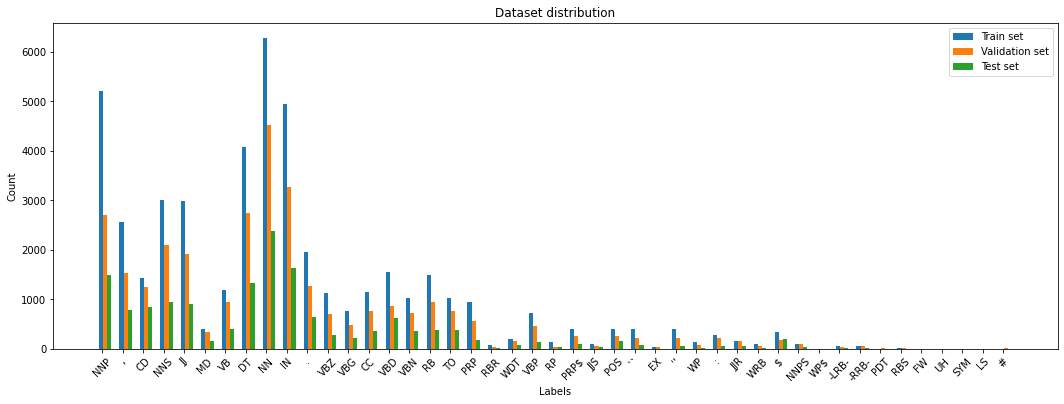

In [ ]:
train_counts = train_set.groupby(by='label').count()
val_counts = val_set.groupby(by='label').count()
val_counts = val_counts.reindex(labels, fill_value=0)
test_counts = test_set.groupby(by='label').count()
test_counts = test_counts.reindex(labels, fill_value=0)
ind = np.arange(len(labels))

plt.figure(figsize=(18,6))
width = 0.2       
plt.bar(ind, train_counts.loc[labels, 'word'] , width, label='Train set');
plt.bar(ind + width, val_counts.loc[labels, 'word'], width, label='Validation set');
plt.bar(ind + 2*width, test_counts.loc[labels, 'word'], width, label='Test set');

plt.xlabel('Labels');
plt.ylabel('Count');
plt.title('Dataset distribution');
plt.xticks(ind + width / 3, labels, rotation=45);
plt.legend();

### Downloading GloVe and creating the embeddings

Glove has 3 .txt file that uses embeddings of different dimensions (50/100/200/300).

In [ ]:
!wget https://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip

--2021-12-01 12:49:28--  https://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2021-12-01 12:49:28--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6B.zip        100%[===================>] 822.24M  3.55MB/s    in 4m 55s  

2021-12-01 12:54:24 (2.79 MB/s) - ‘glove.6B.zip’ saved [862182613/862182613]



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Train set is made of 47356  
OOV1 has 7689 words  
GloVe author affirms '*The pre-trained vectors do not have an unknown token, and currently the code just ignores out-of-vocabulary words when producing the co-occurrence counts*', so he suggests that'*average of all or a subset of the word vectors produces a good unknown vector*'.

In [ ]:
glove_path = '/content/glove.6B.50d.txt'
words = pd.read_csv(glove_path, sep=" ", index_col=0, header=None, quoting=csv.QUOTE_NONE)

def vec(w):
  return words.loc[w].to_numpy()

In [ ]:
words.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50
0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
the,0.418000,0.249680,-0.41242,0.12170,0.34527,-0.044457,-0.49688,-0.17862,-0.00066,-0.656600,0.278430,-0.147670,-0.55677,0.14658,-0.00951,0.011658,0.102040,-0.127920,-0.84430,-0.121810,-0.016801,-0.332790,-0.155200,-0.231310,-0.191810,-1.8823,-0.76746,0.099051,-0.421250,-0.19526,4.0071,-0.185940,-0.522870,-0.31681,0.000592,0.007445,0.17778,-0.158970,0.012041,-0.054223,-0.298710,-0.157490,-0.347580,-0.045637,-0.44251,0.187850,0.002785,-0.184110,-0.115140,-0.78581
",",0.013441,0.236820,-0.16899,0.40951,0.63812,0.477090,-0.42852,-0.55641,-0.36400,-0.239380,0.130010,-0.063734,-0.39575,-0.48162,0.23291,0.090201,-0.133240,0.078639,-0.41634,-0.154280,0.100680,0.488910,0.312260,-0.125200,-0.037512,-1.5179,0.12612,-0.024420,-0.042961,-0.28351,3.5416,-0.119560,-0.014533,-0.14990,0.218640,-0.334120,-0.13872,0.318060,0.703580,0.448580,-0.080262,0.630030,0.321110,-0.467650,0.22786,0.360340,-0.378180,-0.566570,0.044691,0.30392
.,0.151640,0.301770,-0.16763,0.17684,0.31719,0.339730,-0.43478,-0.31086,-0.44999,-0.294860,0.166080,0.119630,-0.41328,-0.42353,0.59868,0.288250,-0.115470,-0.041848,-0.67989,-0.250630,0.184720,0.086876,0.465820,0.015035,0.043474,-1.4671,-0.30384,-0.023441,0.305890,-0.21785,3.7460,0.004228,-0.184360,-0.46209,0.098329,-0.119070,0.23919,0.116100,0.417050,0.056763,-0.000064,0.068987,0.087939,-0.102850,-0.13931,0.223140,-0.080803,-0.356520,0.016413,0.10216
of,0.708530,0.570880,-0.47160,0.18048,0.54449,0.726030,0.18157,-0.52393,0.10381,-0.175660,0.078852,-0.362160,-0.11829,-0.83336,0.11917,-0.166050,0.061555,-0.012719,-0.56623,0.013616,0.228510,-0.143960,-0.067549,-0.381570,-0.236980,-1.7037,-0.86692,-0.267040,-0.258900,0.17670,3.8676,-0.161300,-0.132730,-0.68881,0.184440,0.005246,-0.33874,-0.078956,0.241850,0.365760,-0.347270,0.284830,0.075693,-0.062178,-0.38988,0.229020,-0.216170,-0.225620,-0.093918,-0.80375
to,0.680470,-0.039263,0.30186,-0.17792,0.42962,0.032246,-0.41376,0.13228,-0.29847,-0.085253,0.171180,0.224190,-0.10046,-0.43653,0.33418,0.678460,0.057204,-0.344480,-0.42785,-0.432750,0.559630,0.100320,0.186770,-0.268540,0.037334,-2.0932,0.22171,-0.398680,0.209120,-0.55725,3.8826,0.474660,-0.956580,-0.37788,0.208690,-0.327520,0.12751,0.088359,0.163510,-0.216340,-0.094375,0.018324,0.210480,-0.030880,-0.19722,0.082279,-0.094340,-0.073297,-0.064699,-0.26044


In [ ]:
words.to_csv('/content/drive/MyDrive/NLP/Assignment1/GloVe/glove_50d.csv')

In [ ]:
vec('hello')

array([-0.38497 ,  0.80092 ,  0.064106, -0.28355 , -0.026759, -0.34532 ,
       -0.64253 , -0.11729 , -0.33257 ,  0.55243 , -0.087813,  0.9035  ,
        0.47102 ,  0.56657 ,  0.6985  , -0.35229 , -0.86542 ,  0.90573 ,
        0.03576 , -0.071705, -0.12327 ,  0.54923 ,  0.47005 ,  0.35572 ,
        1.2611  , -0.67581 , -0.94983 ,  0.68666 ,  0.3871  , -1.3492  ,
        0.63512 ,  0.46416 , -0.48814 ,  0.83827 , -0.9246  , -0.33722 ,
        0.53741 , -1.0616  , -0.081403, -0.67111 ,  0.30923 , -0.3923  ,
       -0.55002 , -0.68827 ,  0.58049 , -0.11626 ,  0.013139, -0.57654 ,
        0.048833,  0.67204 ])

In [ ]:
glove_50_path = '/content/drive/MyDrive/NLP/Assignment1/GloVe/glove_50d.csv'
glove_50 = pd.read_csv(glove_50_path)#, header=None, quoting=csv.QUOTE_NONE)

print('Glove total length: {}'.format(len(glove_50)))
print('Number of words in GloVe: {}'.format(len(glove_50['0'].unique())))

glove_50 = glove_50.drop_duplicates(subset = '0', keep='first')
print('Length after elimination: {}'.format(len(glove_50)))

Glove total length: 400000
Number of words in GloVe: 399998
Length after elimination: 399998


In [ ]:
glove_50.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50
0,the,0.418000,0.249680,-0.41242,0.12170,0.34527,-0.044457,-0.49688,-0.17862,-0.00066,-0.656600,0.278430,-0.147670,-0.55677,0.14658,-0.00951,0.011658,0.102040,-0.127920,-0.84430,-0.121810,-0.016801,-0.332790,-0.155200,-0.231310,-0.191810,-1.8823,-0.76746,0.099051,-0.421250,-0.19526,4.0071,-0.185940,-0.522870,-0.31681,0.000592,0.007445,0.17778,-0.158970,0.012041,-0.054223,-0.298710,-0.157490,-0.347580,-0.045637,-0.44251,0.187850,0.002785,-0.184110,-0.115140,-0.78581
1,",",0.013441,0.236820,-0.16899,0.40951,0.63812,0.477090,-0.42852,-0.55641,-0.36400,-0.239380,0.130010,-0.063734,-0.39575,-0.48162,0.23291,0.090201,-0.133240,0.078639,-0.41634,-0.154280,0.100680,0.488910,0.312260,-0.125200,-0.037512,-1.5179,0.12612,-0.024420,-0.042961,-0.28351,3.5416,-0.119560,-0.014533,-0.14990,0.218640,-0.334120,-0.13872,0.318060,0.703580,0.448580,-0.080262,0.630030,0.321110,-0.467650,0.22786,0.360340,-0.378180,-0.566570,0.044691,0.30392
2,.,0.151640,0.301770,-0.16763,0.17684,0.31719,0.339730,-0.43478,-0.31086,-0.44999,-0.294860,0.166080,0.119630,-0.41328,-0.42353,0.59868,0.288250,-0.115470,-0.041848,-0.67989,-0.250630,0.184720,0.086876,0.465820,0.015035,0.043474,-1.4671,-0.30384,-0.023441,0.305890,-0.21785,3.7460,0.004228,-0.184360,-0.46209,0.098329,-0.119070,0.23919,0.116100,0.417050,0.056763,-0.000064,0.068987,0.087939,-0.102850,-0.13931,0.223140,-0.080803,-0.356520,0.016413,0.10216
3,of,0.708530,0.570880,-0.47160,0.18048,0.54449,0.726030,0.18157,-0.52393,0.10381,-0.175660,0.078852,-0.362160,-0.11829,-0.83336,0.11917,-0.166050,0.061555,-0.012719,-0.56623,0.013616,0.228510,-0.143960,-0.067549,-0.381570,-0.236980,-1.7037,-0.86692,-0.267040,-0.258900,0.17670,3.8676,-0.161300,-0.132730,-0.68881,0.184440,0.005246,-0.33874,-0.078956,0.241850,0.365760,-0.347270,0.284830,0.075693,-0.062178,-0.38988,0.229020,-0.216170,-0.225620,-0.093918,-0.80375
4,to,0.680470,-0.039263,0.30186,-0.17792,0.42962,0.032246,-0.41376,0.13228,-0.29847,-0.085253,0.171180,0.224190,-0.10046,-0.43653,0.33418,0.678460,0.057204,-0.344480,-0.42785,-0.432750,0.559630,0.100320,0.186770,-0.268540,0.037334,-2.0932,0.22171,-0.398680,0.209120,-0.55725,3.8826,0.474660,-0.956580,-0.37788,0.208690,-0.327520,0.12751,0.088359,0.163510,-0.216340,-0.094375,0.018324,0.210480,-0.030880,-0.19722,0.082279,-0.094340,-0.073297,-0.064699,-0.26044


In [ ]:
def oov_embeddings(vocabulary : pd.DataFrame):
   return np.array([np.mean(vocabulary[str(i)]) for i in range(1, 51)])

def new_vocabulary(old_vocabulary : pd.DataFrame, OOV: list, oov_embeddings: np.array):
  for word in OOV:
    dict1 = {'0': word}
    dict2 = {dict2 = {str(i+1) : oov_embeddings[i] for i in range(0, vocabulary.shape[1])}}

In [ ]:
print(glove_50.shape[1])

51


In [ ]:
print('Number of words in the train set : {}'.format(len(train_set['word'].unique())))
print('Number of words OOV : {}'.format(len(oov1)))

OOV1 = []
for word in train_set['word'].unique():
  if word not in list(glove_50['0']):
    OOV1.append(word)


print(print('Number of words OOV : {}'.format(len(OOV1)))


47356
8009
399998
2346


In [ ]:
V2 = glove_50

for word in OOV1:
  dict1 = {'0': word}
  dict2 = {str(i+1) : oov1_embeddings[i] for i in range(0, 50)}
  dict1.update(dict2)
  V2 = V2.append(dict1, ignore_index=True)

print('Number of words in the new vocabulary V2 : {}'.format(len(V2)))

In [ ]:
print(OOV1)

0                  Pierre
1                  Vinken
2                    Nov.
3                     Mr.
4                Elsevier
              ...        
2341    building-products
2342             new-home
2343      forest-products
2344              Kathryn
2345              McAuley
Length: 2346, dtype: object


In [ ]:
print(train_set[train_set['word'] == 'new-home'])

           word label
47156  new-home    JJ
47169  new-home    JJ


In [ ]:
def unk_embeddings(vocabulary):
  #if os.path.exists(vocabulary): 
  # with open(vocabulary, 'r') as f:
  #   for i, line in enumerate(f):
  #        pass
  #  n_words = i + 1
  #  dimensions = len(line.split(' ')) - 1

  #  vecs = np.zeros((n_vec, hidden_dim), dtype=np.float32)

  #  with open(vocabulary, 'r') as f:
  #    for i, line in enumerate(f):
  #      vecs[i] = np.array([float(n) for n in line.split(' ')[1:]], dtype=np.float32)

  #else:
    n_words = len(vocabulary)
    dimensions = vocabulary.values[0]

    vecs = np.zeros((n_words, dimensions), dtype=np.float32)

    for i, line in enumerate(f):
        vecs[i] = np.array([float(n) for n in line.split(' ')[1:]], dtype=np.float32)

    return np.mean(vecs, axis=0)


def oov(vocabulary, dataset, average_vec):
  for word in list(dataset):
    if word not in vocabulary:
      vocabulary[word] = average_vec

  return vocabulary

### Create RNN and Optimizer classes


In [ ]:
class LSTM(nn.Module):
  def __init__(self, input_dim, hidden_size, output_size, layers, dropout, device):
    super(RNN, self).__init__()
    self.n_layers = layers
    self.output_size = output_size
    self.hidden_size = hidden_size
    self.device = device
    self.rnn = nn.LSTM(input_dim, hidden_size, num_layers=self.n_layers, dropout=dropout)
    self.fc = nn.Linear(self.n_layers*self.hidden_size, output_size)


  def forward(self, input):
    #initialize hidden state and cell state
    hidden = (torch.randn(self.n_layers, input.shape[1],
                          self.hidden_size).to(self.device),
              torch.randn(self.n_layers, input.shape[1],
                          self.hidden_size).to(self.device))


    output, hidden = self.lstm(input, hidden)

    h_n = hidden[0].permute(1, 0, 2)
    h_n = h_n.contiguous().view(h_n.shape[0], -1)

    logits = self.fc(h_n)

    return logits

In [ ]:
class Optimization:
    def __init__(self, model, loss_fn, optimizer):
        self.model = model
        self.loss_fn = loss_fn
        self.optimizer = optimizer
        self.train_losses = []
        self.val_losses = []
    
    def train_step(self, x, y):
        self.model.train()
        
        yhat = self.model(x)
        loss = self.loss_fn(y, yhat)
        loss.backward()

        self.optimizer.step()
        self.optimizer.zero_grad()

        return loss.item()

### Training